In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Nameing the columns with meaningful words 

In [2]:
x=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
dt=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',names=x)

In [3]:
dt.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# we need to replace ?/ missing values with nan value in the data set


In [4]:
dt.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
dt.replace({'Bare Nuclei':{'?':np.nan}},inplace=True)

In [6]:
dt.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [7]:
dt['Bare Nuclei']=pd.to_numeric(dt['Bare Nuclei'])

# Filling null values  

In [8]:
dt['Bare Nuclei']=dt.groupby('Class')['Bare Nuclei'].apply(lambda x:x.fillna(x.mean()))

In [9]:
dt.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Storeing the data into offline mode


In [10]:
dt.to_csv('breastcancer.csv')

In [11]:
dt1=pd.read_csv('breastcancer.csv')

In [12]:
dt1.head()

,Unnamed: 0,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [13]:
dt1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
dt1.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


# correlation between the data set  


# if corr is +1 then it is directly correlated and it is useless as we will result in overfitting


# if corr is -1 then it is inversly correlated and it is useless as we will result in overfitting


# if corr is 0 then netural corr hence it results in underfitting(input and output)

#  -.2 to -.85 then we can use it



# #0.2 to 0.85 then also we can use

In [15]:
dt.corr()['Class']

Sample code number            -0.080226
Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.824843
Bland Chromatin                0.756616
Normal Nucleoli                0.712244
Mitoses                        0.423170
Class                          1.000000
Name: Class, dtype: float64

In [16]:
dt.drop(['Sample code number'],axis=1,inplace=True)

In [17]:
a=dt.groupby('Class')
a

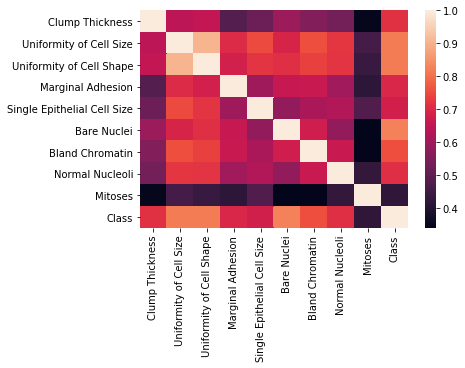

In [18]:
sb.heatmap(dt.corr())

# Prediction of  which type of breastcancer it is using sklearn 

# Dividing the data set into feasible and label data set.

In [19]:
fs=dt.drop(['Class'],axis=1)
label=dt['Class']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#we are going to divide the dataq set into 4 part
#x_tr=75% of  fs data
#x_ts=25% of fs data
#y_ts=75% of label data
#y_ts=25% of label data
#(it is all being done to test and train the data set)

In [21]:
x_tr,x_ts,y_tr,y_ts=train_test_split(fs,label,test_size=0.25)

In [22]:
x_tr

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
471,6,1,1,3,2,1.0,1,1,1
566,3,1,2,1,2,1.0,3,1,1
561,5,1,1,1,2,1.0,3,1,1
393,1,1,1,1,1,1.0,1,1,1
276,3,1,1,1,2,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...
400,3,10,8,7,6,9.0,9,3,8
79,2,1,1,1,3,1.0,2,1,1
88,4,1,1,1,2,1.0,3,1,1
245,5,1,1,2,2,2.0,3,1,1


In [23]:
algo=KNeighborsClassifier()
algo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
algo.fit(x_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#  Total score using sklearn

In [25]:
algo.score(x_ts,y_ts)

0.9542857142857143

# we are going to construct the algo of KNN without use of sklearn
# and create a class for the whole.

In [26]:
dt1=dt.copy()

In [27]:
dt1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [28]:
fs=dt1.drop(['Class'],axis=1)
label=dt1['Class']

# Train and Test Method 

In [29]:
import random
def train_test_split(*arg,test_size):
    a=set([i.shape[0] for i in arg])
    assert(len(a)==1),'shape did not match'+str(a)
    ind=list(arg[0].index)
    random.shuffle(ind)
    test_index=ind[:round(len(ind)*test_size)]
    data=[]
    for i in arg:
        data.append(i.drop(test_index))#it willdrop the test index elemnt from data and
        #return train data
        data.append(i.iloc[test_index])#it will select test data via index
    return data

In [30]:
x_tr,x_ts,y_tr,y_ts=train_test_split(fs,label,test_size=0.25)
x_tr.shape,x_ts.shape

((524, 9), (175, 9))

#  Fit Method

In [31]:
grp=dict.fromkeys(y_tr)
for i in grp:
    grp[i]=[]
for i in x_tr.index:
    grp[y_tr.loc[i]].append(x_tr.loc[i].values)
grp

{2: [array([5., 1., 1., 1., 2., 1., 3., 1., 1.]),
  array([3., 1., 1., 1., 2., 2., 3., 1., 1.]),
  array([6., 8., 8., 1., 3., 4., 3., 7., 1.]),
  array([4., 1., 1., 3., 2., 1., 3., 1., 1.]),
  array([ 1.,  1.,  1.,  1.,  2., 10.,  3.,  1.,  1.]),
  array([2., 1., 1., 1., 2., 1., 1., 1., 5.]),
  array([4., 2., 1., 1., 2., 1., 2., 1., 1.]),
  array([1., 1., 1., 1., 1., 1., 3., 1., 1.]),
  array([2., 1., 1., 1., 2., 1., 2., 1., 1.]),
  array([1., 1., 1., 1., 2., 3., 3., 1., 1.]),
  array([4., 1., 1., 1., 2., 1., 2., 1., 1.]),
  array([4., 1., 1., 1., 2., 1., 3., 1., 1.]),
  array([6., 1., 1., 1., 2., 1., 3., 1., 1.]),
  array([3., 2., 1., 1., 1., 1., 2., 1., 1.]),
  array([5., 1., 1., 1., 2., 1., 2., 1., 1.]),
  array([2., 1., 1., 1., 2., 1., 2., 1., 1.]),
  array([1., 1., 3., 1., 2., 1., 1., 1., 1.]),
  array([3., 1., 1., 1., 1., 1., 2., 1., 1.]),
  array([2., 1., 1., 2., 2., 1., 3., 1., 1.]),
  array([3., 1., 2., 1., 2., 1., 2., 1., 1.]),
  array([2., 1., 1., 1., 2., 1., 2., 1., 1.]),
 

# Predict Method

In [32]:
from scipy.spatial.distance import minkowski
def knn(dts,prd,k=3):
    dist=[]
    for grp in dts:
        for p in dts[grp]:
            dist.append((minkowski(p,prd),grp))
    votes=[i[1] for i in sorted(dist)[:k]]
    return max(votes,key=lambda x:votes.count(x))
knn(grp,x_ts.iloc[5]),y_ts.iloc[5]

(2, 2)

# Score

In [33]:
m=list(map(lambda l:knn(grp,l),x_ts.values))
sum(m==y_ts)/len(x_ts)

0.9657142857142857

In [34]:
class KNN:
    def __init__(s,n=5):
        s.n=n
    def fit(s,x_tr,y_tr):
        s.grp=dict.fromkeys(y_tr)
        for i in s.grp:
            s.grp[i]=[]
        for i in x_tr.index:
            s.grp[y_tr.loc[i]].append(x_tr.loc[i].values)
    def predict(s,prd):
        dist=[]
        for g in s.grp:
            for p in s.grp[g]:
                dist.append((minkowski(p,prd),g))
        votes=[i[1] for i in sorted(dist)[:s.n]]
        return max(votes,key=lambda x:votes.count(x))
    def score(s,x_ts,y_ts):
        m=list(map(s.predict,x_ts.values))
        return sum(m==y_ts)/len(x_ts)

In [35]:
al=KNN()
al.fit(x_tr,y_tr)
al.score(x_ts,y_ts)

0.9657142857142857

# Manual Checking

In [36]:
#we have construct a device that can genrate the input so that we can predict output.
al.predict([[2,1,1,1,2,1.0,1,1,5]])

2